In [138]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [139]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
ss=pd.read_csv('gender_submission.csv')

In [140]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
train.shape

(891, 12)

In [142]:
test.shape

(418, 11)

In [143]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [144]:
ss.shape

(418, 2)

In [145]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [146]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [147]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

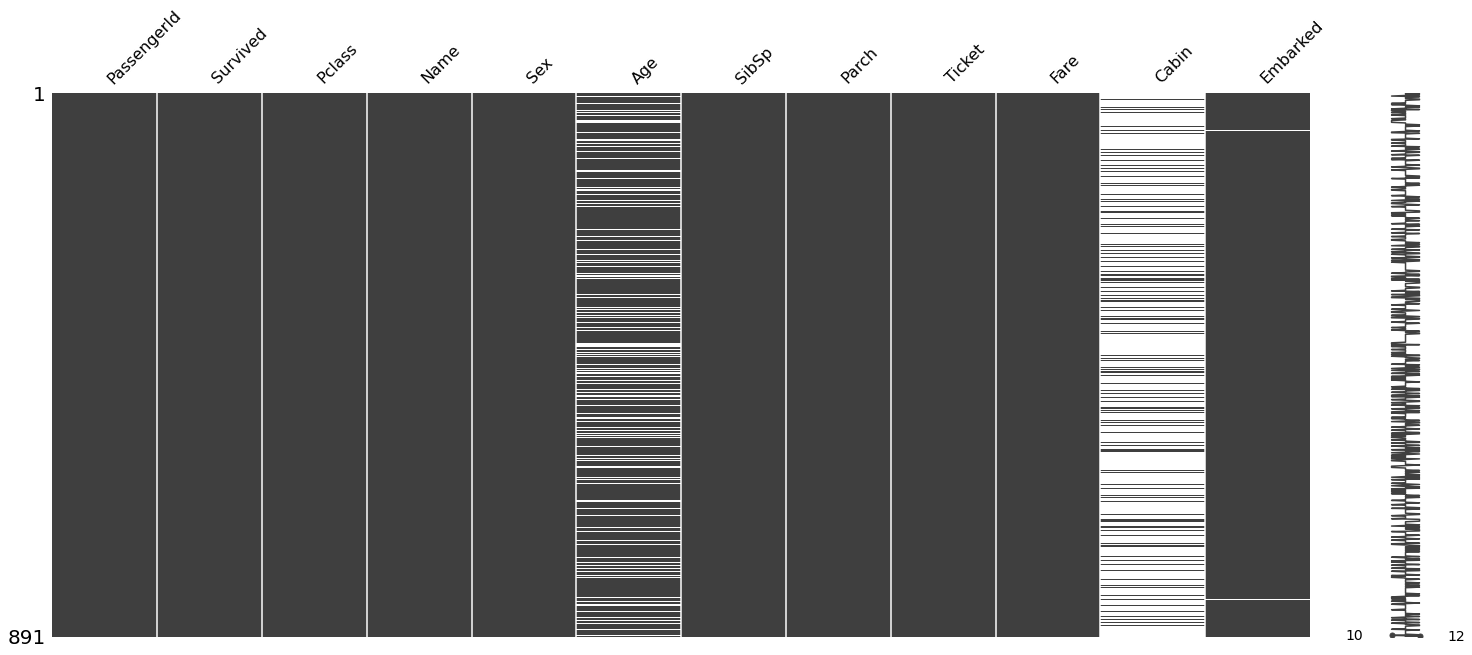

In [148]:
# Missing data in training set

missingno.matrix(train)

<AxesSubplot:>

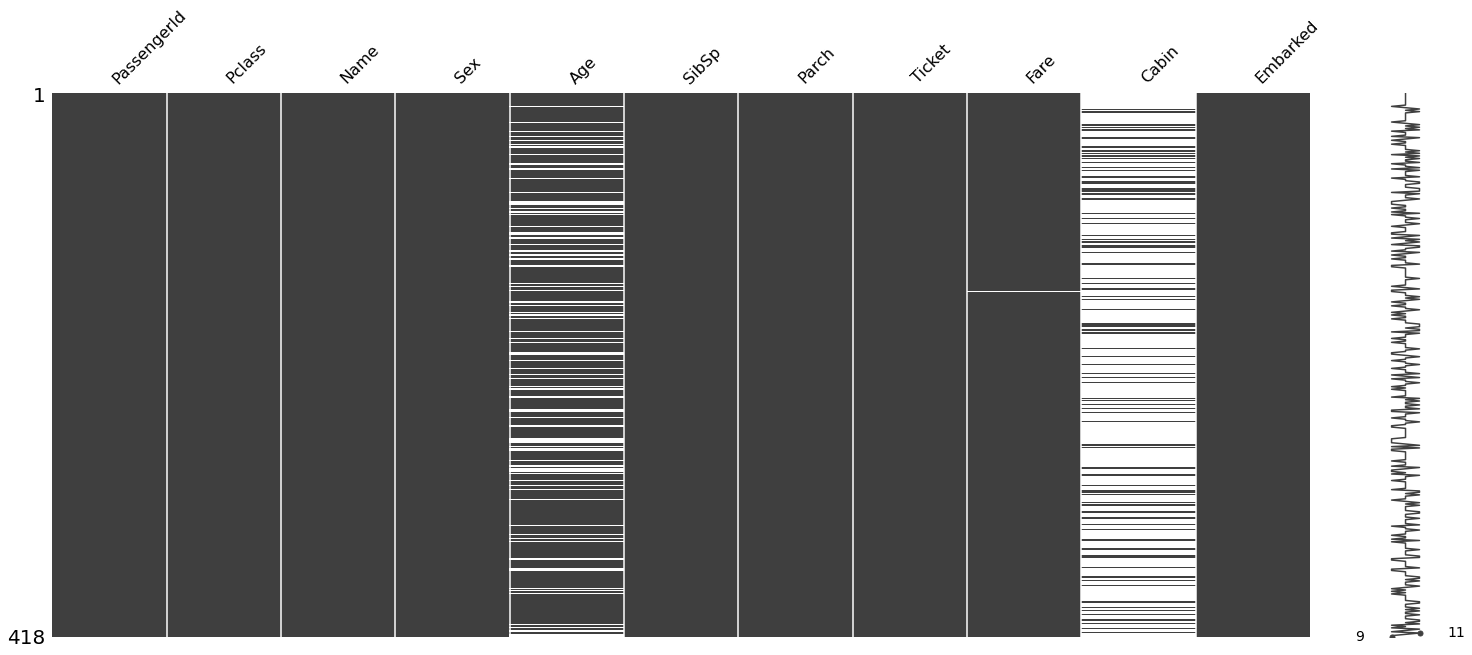

In [149]:
missingno.matrix(test)

In [150]:
# Summary statistics for training set 

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [151]:
# Summary status of Test Set

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Analysing Categorical varibles

#### Checking for Sex 

In [152]:
#mean of survivors by Sex
train[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

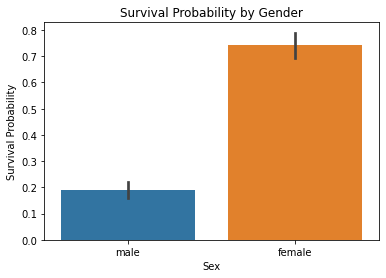

In [153]:
sns.barplot(x='Sex',y='Survived',data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

# NOTE: Female passengers are more likely to survive

#### Checking for Pclass

In [154]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [155]:
# mean of Survival by Passenger Class
train[['Pclass','Survived']].groupby('Pclass').mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0.5, 1.0, 'Survival Probablity by Passenger Class')

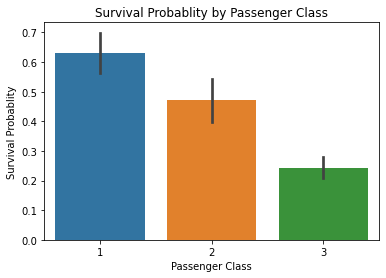

In [156]:
sns.barplot(x='Pclass',y='Survived',data=train)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Probablity')
plt.title('Survival Probablity by Passenger Class')

# NOTE: Survival Probability decreases with decreasing Passenger Class

Text(0.5, 1.0, "Survival Probability by Passenger Class' Sex")

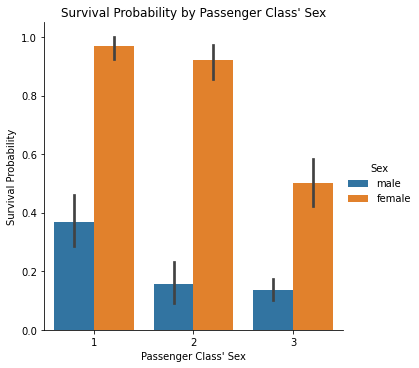

In [157]:
sns.factorplot(x='Pclass',y='Survived',hue='Sex',data=train,kind='bar')
plt.xlabel("Passenger Class' Sex")
plt.ylabel('Survival Probability')
plt.title("Survival Probability by Passenger Class' Sex")

It seems that women were highly priortized more than men; and within the women, women having 1st class and 2nd class tickets were highly priortized more than women with 3rd class tickets (because of less difference of the survival probability between women having 1st class and 2nd class tickets). Whereas, in the case of men it seems that men having 1st class tickets were highly priortized more than men having 2nd and 3rd class tickets(because of less difference of the survival probability between men having 2nd class and 3rd class tickets).

#### Checking for Embarked

In [158]:
# values count of the Embarked Column

train['Embarked'].value_counts(dropna=False)

# NOTE: We have two missing values

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [159]:
# Mean of Survival by point of Embarkation

train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

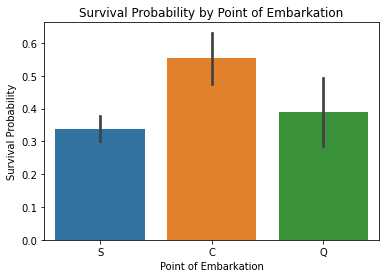

In [160]:
sns.barplot(x='Embarked',y='Survived',data=train)
plt.xlabel('Point of Embarkation')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

Survival probability is highest for location C and lowest for location S.

We can formulate a hypothesis as that the majority of the first class passengers have embarked from location C because they have a highest survival probability, this has resulted in location C having a highest survival probability. Whereas, there could have been more third class passengers that embarked from location S and because they have the lowest survival probability, this has caused location S to have the lowest survival probability.

Let us now test this hypothesis.

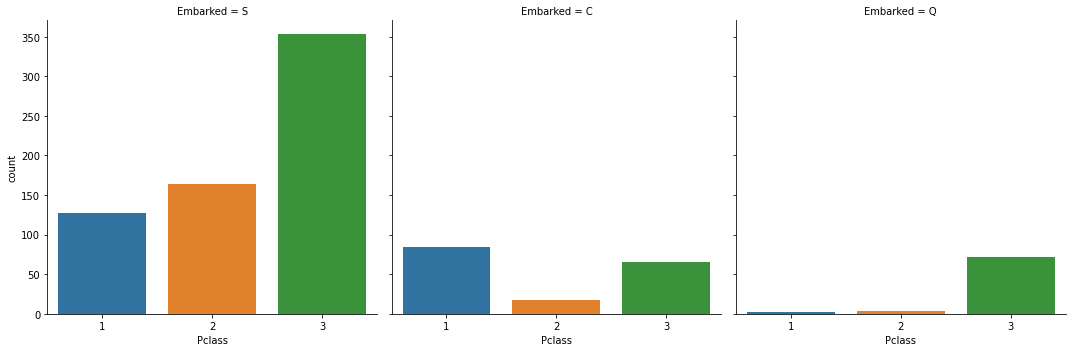

In [161]:
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count')

Our hypothesis appears to be true. The passengers in Embarkment S are mosttly from 3rd class, whereas, the passengers in Embarkment C are mostly from 1st class.

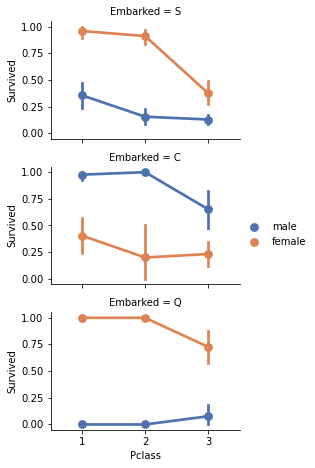

In [162]:
# Survival Probabilty by all three Categorical Variabl, i.e, Sex, Pclass and Embarked.
# So basically we will have 2 sex category, 3 embarkment category and 3 passenger class category, i.e, total of 18 combinations.

grid = sns.FacetGrid(train, row='Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

We also found something unusual here, we can see that in Embarkment C the Survival Probability of Male is more than Female. Let us check the total male and female in Embarked C, we expect there should be more male.

In [163]:
embarked_c_female=train[(train['Sex'] == 'female') & (train['Embarked'] == 'C')]
embarked_c_female.shape[0]

73

In [164]:
embarked_c_male=train[(train['Sex'] == 'male') & (train['Embarked'] == 'C')]
embarked_c_male.shape[0]

95

### Analysing Numerical varibles: SibSp, Parch, Age and Fare

#### Checking for Outliers

In [165]:
# Tukey's IQR method for detecting outlers
def detect_outliers(df, n, features):
    """"
    Tukey’s technique is used to detect outliers. The general rule is that anything not in the
    range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed. Inter Quartile Range (IQR)=Q3-Q1.
    Q1 and Q3 is 1st and 3rd quarter.
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25) # 1st quartile (25%)
        Q3 = np.percentile(df[col], 75) # 3rd quartile (75%)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        
        # Determining a list of indices of outliers
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        
        # appending the list of outliers 
        outlier_indices.extend(outlier_list_col) 
        
    # selecting observations containing more than x outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [166]:
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [167]:
# dropping the outliers and reseting thr indexes

print("Before: {} rows".format(len(train)))
train=train.drop(outliers_to_drop,axis=0).reset_index(drop=True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


#### Numerical variables correlation with survival

<AxesSubplot:>

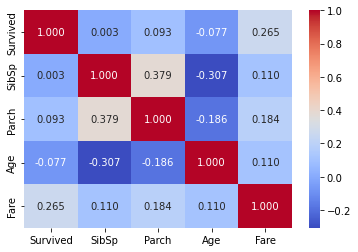

In [168]:
sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(),annot=True,fmt='.3f',cmap='coolwarm')

#### Numerical variable: SibSp

In [169]:
# Value counts of SibSp column
train['SibSp'].value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [170]:
# Mean of suvival by Sibsp

train[['SibSp','Survived']].groupby('SibSp').mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
4,0.166667
3,0.153846
5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

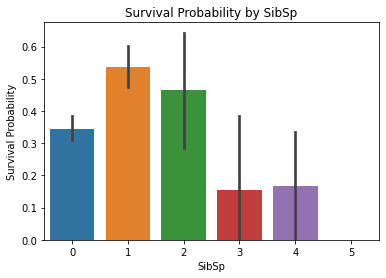

In [171]:
sns.barplot(x='SibSp',y='Survived',data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

#### Numerical variable: Parch

In [172]:
# Value counts by Parch Column
train['Parch'].value_counts(dropna=False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [173]:
# Mean of suvival Parch

train[['Parch','Survived']].groupby('Parch').mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.542857
0,0.343658
5,0.200000
4,0.000000
6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

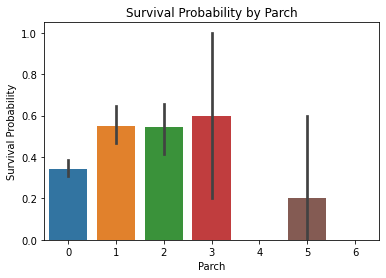

In [174]:
sns.barplot(x='Parch',y='Survived',data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

#### Numerical variabkes: Age

In [175]:
# Null values

train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

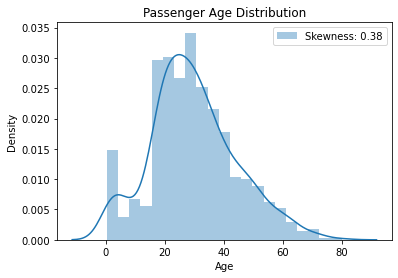

In [176]:
# Passenger age Disrtibution

sns.distplot(train['Age'], label='Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc='best')
plt.title('Passenger Age Distribution')

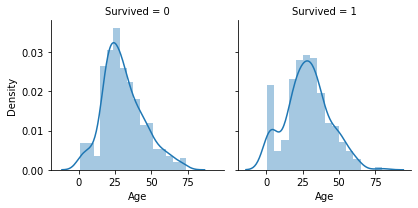

In [177]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

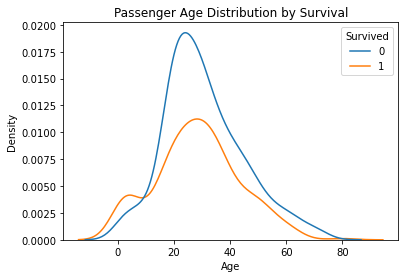

In [178]:
sns.kdeplot(data=train, x="Age", hue="Survived")
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

We can observe that the passengers that are of younger ages(between 1-18years) are more likely to survive and this is due to the fact that just like women, children were also priortized during evacuation of the Titanic and causing them to have higher probabilty of Survival.

#### Numerical variabkes: Fare

In [179]:
# Null values of Fare Column

train['Fare'].isnull().sum()

0

Text(0.5, 1.0, 'Passenger Fare Distribution')

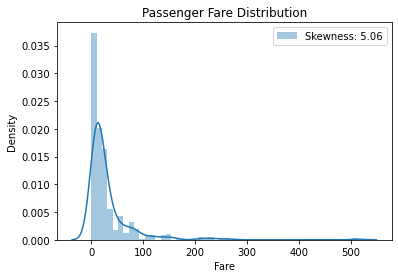

In [180]:
# Passenger fair distribution

sns.distplot(train['Fare'],label='Skewness: %.2f'%train['Fare'].skew())
plt.legend(loc='best')
plt.title('Passenger Fare Distribution')

Fair have high skewness. We have to apply log transformation.

### Data Preprocessing

#### Dropping and filling the missing values

In [181]:
# Dropping ticket and cabin features from both train and test dataset as it does not seem to affect the model.

train=train.drop(['Ticket','Cabin'],axis=1)
test=test.drop(['Ticket','Cabin'],axis=1)

In [182]:
# Missing values in Training Set

train.isnull().sum().sort_values(ascending=False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [183]:
mode=train['Embarked'].dropna().mode()[0]
mode

'S'

In [184]:
# Filling missing values of Embarked with the mode

train['Embarked'].fillna(mode,inplace=True)

In [185]:
# Missing values in Test Set

test.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [186]:
median=test['Fare'].dropna().median()
median

14.4542

In [187]:
# Fill missing value in Fare with median

test['Fare'].fillna(median, inplace = True)

Now we only have the Age feature which have missing values in Train and Test dataset. So we will combime them.

In [188]:
combine=pd.concat([train,test],axis=0).reset_index(drop=True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [189]:
combine.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1299.000000,881.000000,1299.000000,1043.000000,1299.000000,1299.000000,1299.000000
mean,657.093149,0.385925,2.294072,29.903806,0.452656,0.372594,32.555112
std,377.743244,0.487090,0.837150,14.427548,0.879416,0.857157,50.677613
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,331.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,657.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,984.500000,1.000000,3.000000,39.000000,1.000000,0.000000,30.597900
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [190]:
# Missing values in combined Set

combine.isnull().sum().sort_values(ascending=False)

Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

We will ignore the missing values of Survived column because they are all from the Test set. Now for filling of Age column we need to find the most correlated features and accordingly fill the value for Age.

In [191]:
# converting Sex into numerical variable

combine['Sex']=combine['Sex'].map({'male':0,'female':1})

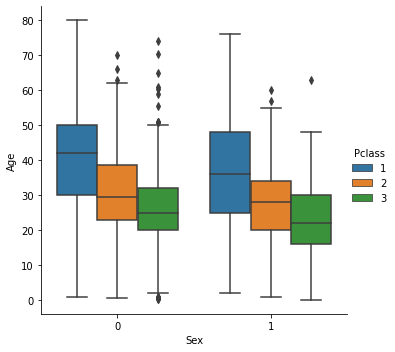

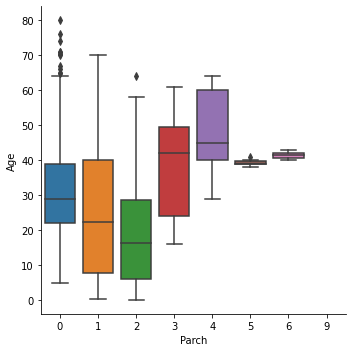

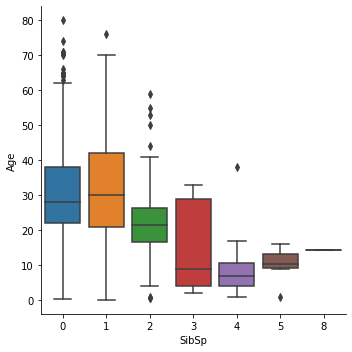

In [192]:
sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'Parch', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine)

<AxesSubplot:>

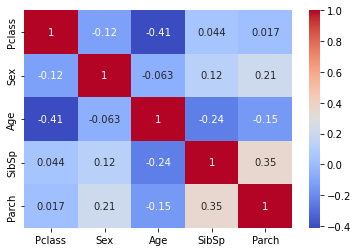

In [193]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

Age is not correlated with Sex but is negatively correlated with SibSp, Parch and Pclass.

In [194]:
# Checking number of missing ages 

age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

Looping through each missing age in the list to locate the rows that have the same SibSp, Parch and PClass values and filling the missing age with the median of those rows. If rows are not found, simply filling the missing age with the median of the entire Age column.

In [195]:
for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [196]:
combine['Age'].isnull().sum()

0

Applying Log Transformation on the Fare column

Text(0.5, 1.0, 'Passenger Fare Distribution')

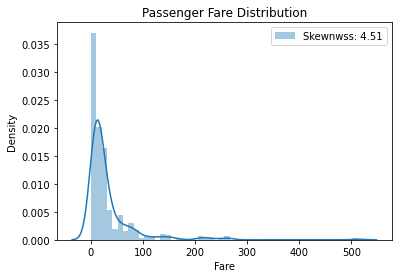

In [197]:
# Passenger Fair distribution

sns.distplot(combine['Fare'], label='Skewnwss: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [198]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

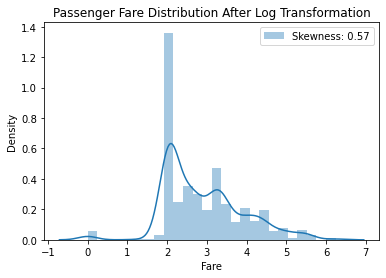

In [199]:
# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'],label='Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc='best')
plt.title('Passenger Fare Distribution After Log Transformation')

###### Creating new features from existing features to improved our model accuracy.

Creating a feature called Title, for that we need to extract the Title from the name column.

In [200]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [201]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [202]:
# Values count of Title

combine['Title'].value_counts(ascending=False)

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [203]:
# Number of unique Title

combine['Title'].nunique()

18

In [204]:
combine['Title']=combine['Title'].replace(['Rev','Dr','Col','Major','Lady','Sir','Don','Capt','the Countess','Jonkheer','Dona'],'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

In [205]:
combine['Title'].nunique()

5

<AxesSubplot:xlabel='Title', ylabel='count'>

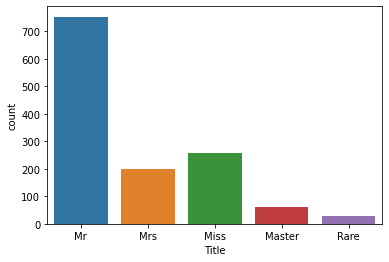

In [206]:
sns.countplot(combine['Title'])

In [207]:
# Mean of Survival by Name Title

combine[['Title','Survived']].groupby('Title').mean().sort_values(by='Survived',ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.711111
Master,0.589744
Rare,0.347826
Mr,0.157895


Text(0.5, 1.0, 'Mean of survival by Title')

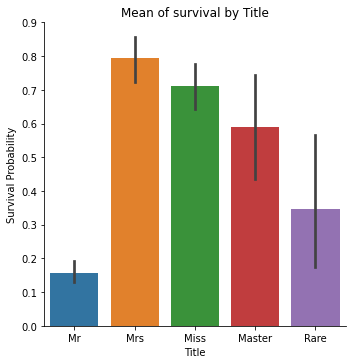

In [208]:
sns.factorplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [209]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


###### Creating a feature called IsAlone, which tells if the Passenger is alone or have family memer on board

In [210]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [211]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending =False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


we do not see any much difference between a solo passenger and a passenger with family, however we can put the passenger with different number of family members in a single column specifying if they are alone or not.

In [212]:
# Creating IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [213]:
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

# here 1 is alone and 0 is not alone

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


So passengers that were not alone on the Titanic were more likely to survive than that were alone.

In [214]:
# Dropping SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


###### Creating a feature called Age*Class:

To create our new Age*Class feature, we need to first transform Age into an ordinal variable.

Grouping Ages into 5 separate age bands and assign a number to each age band.

In [215]:
# Creating age bands and computing mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [216]:
# Assigning ordinals to each age band 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [217]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [218]:
# Age and Pclass data types 

combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [219]:
# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int32')

In [220]:
# Create Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [221]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [222]:
# Making dummy variables for Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [223]:
combine['Fare'].max()

6.238967387173662

In [224]:
# Dividing Fare in four bands

combine['FareBand']=pd.cut(combine['Fare'],4)
combine[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [225]:
# Assigning Ordinals to each FareBand

combine.loc[combine['Fare']<=1.56,'Fare']=0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare']>4.679,'Fare']=3

In [226]:
combine['Fare']=combine['Fare'].astype('int')

In [227]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

In [228]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [229]:
# Now seperating the train and test dataset from the combine dataset

train=combine[:len(train)]
test=combine[len(train):]

In [230]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [231]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,0.350738,1.317821,1.424518,0.609535,2.743473,0.044268,0.204313,0.582293,0.143019,0.026107,0.190692,0.087401,0.721907
std,256.617021,0.487090,0.835055,0.477472,0.834627,0.624527,0.488132,1.782499,0.205806,0.403428,0.493462,0.350291,0.159543,0.393070,0.282582,0.448314
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,448.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,4.000000,3.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [232]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   881 non-null    int64  
 1   Survived      881 non-null    float64
 2   Pclass        881 non-null    int64  
 3   Sex           881 non-null    int64  
 4   Age           881 non-null    int32  
 5   Fare          881 non-null    int32  
 6   IsAlone       881 non-null    int64  
 7   Age*Class     881 non-null    int64  
 8   Title_Master  881 non-null    uint8  
 9   Title_Miss    881 non-null    uint8  
 10  Title_Mr      881 non-null    uint8  
 11  Title_Mrs     881 non-null    uint8  
 12  Title_Rare    881 non-null    uint8  
 13  Em_C          881 non-null    uint8  
 14  Em_Q          881 non-null    uint8  
 15  Em_S          881 non-null    uint8  
dtypes: float64(1), int32(2), int64(5), uint8(8)
memory usage: 55.2 KB


In [233]:
# Converting Survived from float to int

train['Survived']=train['Survived'].astype('int')
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [234]:
# Deletong the PassengerId column

train=train.drop('PassengerId',axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [235]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [236]:
# Dropping Survived column from Test dataset

test=test.drop('Survived',axis=1)

In [237]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


### Modelling

We will use the following models of SciKit Learn:

•Logistic regression  
•Support vector machines  
•K-nearest neighbours  
•Gaussian naive bayes  
•Perceptron  
•Linear SVC  
•Stochastic gradient descent  
•Decision tree  
•Random forest  
•CatBoost

In [238]:
# Spliting the training data

X_train=train.drop('Survived',axis=1)
Y_train=train['Survived']
X_test=test.drop('PassengerId',axis=1).copy()
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',Y_train.shape)
print('X_test shape: ',X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


In [239]:
train.shape

(881, 15)

In [240]:
test.shape

(418, 15)

In [241]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [242]:
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


### Logistic Regression

In [243]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train,Y_train)*100,2)
acc_log

80.93

### Support vector machines

In [244]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

### K-nearest neighbours (KNN)

In [245]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.34

### Gaussian naive bayes

In [246]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.11

### Perceptron

In [247]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.57

### Linear SVC

In [248]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

### Stochastic gradient descent

In [249]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

75.37

### Decision Tree

In [250]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.7

### Random Forest

In [251]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.7

### CatBoost

In [252]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)
acc_catboost

Learning rate set to 0.00976
0:	learn: 0.6868136	total: 2.13ms	remaining: 2.13s
1:	learn: 0.6798485	total: 4.17ms	remaining: 2.08s
2:	learn: 0.6729520	total: 6.55ms	remaining: 2.18s
3:	learn: 0.6669729	total: 9.55ms	remaining: 2.38s
4:	learn: 0.6607853	total: 12ms	remaining: 2.4s
5:	learn: 0.6554568	total: 14.2ms	remaining: 2.36s
6:	learn: 0.6500727	total: 16.8ms	remaining: 2.38s
7:	learn: 0.6437982	total: 19.4ms	remaining: 2.4s
8:	learn: 0.6398272	total: 23.4ms	remaining: 2.57s
9:	learn: 0.6351628	total: 26.2ms	remaining: 2.6s
10:	learn: 0.6305969	total: 28.7ms	remaining: 2.58s
11:	learn: 0.6252274	total: 30.9ms	remaining: 2.54s
12:	learn: 0.6203165	total: 33.1ms	remaining: 2.51s
13:	learn: 0.6163249	total: 35.7ms	remaining: 2.51s
14:	learn: 0.6126752	total: 38.2ms	remaining: 2.51s
15:	learn: 0.6078515	total: 40.4ms	remaining: 2.49s
16:	learn: 0.6033553	total: 42.7ms	remaining: 2.47s
17:	learn: 0.5984437	total: 44.7ms	remaining: 2.44s
18:	learn: 0.5935188	total: 47ms	remaining: 2.43s


85.7

In [253]:
acc_catboost

85.7

All our model have been trained, now let us see which of the model have highest prediction accuracy.

In [254]:
models= pd.DataFrame({'Models': ['Logistic regression','Support vector machines','K-nearest neighbours',
                                 'Gaussian naive bayes','Perceptron','Linear SVC','Stochastic gradient descent',
                                 'Decision tree','Random forest','CatBoost'], 
                      'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})

models.sort_values(by='Score',ascending=False,ignore_index=True)

,Models,Score
0,Gaussian naive bayes,85.70
1,Random forest,85.70
2,CatBoost,85.70
3,Support vector machines,84.34
4,Logistic regression,83.09
5,K-nearest neighbours,80.93
6,Decision tree,80.25
7,Linear SVC,79.57
8,Perceptron,79.11
9,Stochastic gradient descent,75.37


The training accuracy does not give the entire story instead we should focus on the model's ability to predict out-of-samples data(data our model has not seen before).

Cross validation allows us to compare different ML techniques and get a sense of how well they will work in practice.  We will use k-fold cross validation technique. It is a technique where a subset of our training set is kept aside and will act as holdout set for testing purposes.

## K-fold cross validation

In [255]:
# Creating a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [256]:
# Creating a list which contains cross validation results for each classifier(10 fold cross validation)

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6870154	total: 3.44ms	remaining: 3.44s
1:	learn: 0.6803102	total: 6.58ms	remaining: 3.28s
2:	learn: 0.6743326	total: 9.51ms	remaining: 3.16s
3:	learn: 0.6684760	total: 12.2ms	remaining: 3.04s
4:	learn: 0.6624557	total: 14.8ms	remaining: 2.95s
5:	learn: 0.6573314	total: 17.7ms	remaining: 2.92s
6:	learn: 0.6520748	total: 20.8ms	remaining: 2.95s
7:	learn: 0.6460856	total: 23.7ms	remaining: 2.94s
8:	learn: 0.6422711	total: 25.9ms	remaining: 2.85s
9:	learn: 0.6376840	total: 28.6ms	remaining: 2.83s
10:	learn: 0.6326541	total: 31.4ms	remaining: 2.83s
11:	learn: 0.6272334	total: 34.8ms	remaining: 2.86s
12:	learn: 0.6224744	total: 37.7ms	remaining: 2.86s
13:	learn: 0.6175199	total: 40.8ms	remaining: 2.87s
14:	learn: 0.6124417	total: 43.6ms	remaining: 2.86s
15:	learn: 0.6097890	total: 45.3ms	remaining: 2.78s
16:	learn: 0.6050558	total: 47.9ms	remaining: 2.77s
17:	learn: 0.6004952	total: 51.1ms	remaining: 2.79s
18:	learn: 0.5958639	total: 53.4ms	remaining

In [257]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [258]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 
                       'Algorithm': ['Logistic regression','Support vector machines',
                                     'K-nearest neighbours','Gaussian naive bayes',
                                     'Perceptron','Linear SVC','Stochastic gradient descent',
                                     'Decision tree','Random forest','CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821782,0.042574,Support vector machines
1,0.820684,0.038157,K-nearest neighbours
2,0.815028,0.036378,CatBoost
3,0.804814,0.034441,Random forest
4,0.804801,0.029279,Logistic regression
5,0.800243,0.033294,Linear SVC
6,0.790041,0.024733,Decision tree
7,0.783223,0.041915,Gaussian naive bayes
8,0.733287,0.043881,Perceptron
9,0.718871,0.118231,Stochastic gradient descent


Text(0.5, 1.0, 'Cross Validation Scores')

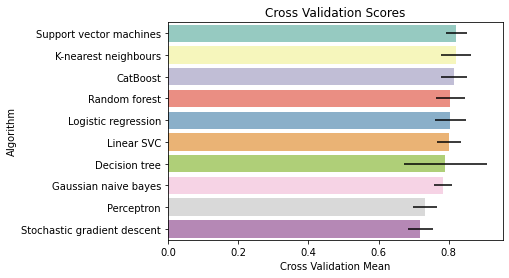

In [259]:
sns.barplot('Cross Validation Mean', 'Algorithm', data =
            cv_res, order = cv_res.
            sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

As we can see, support vector machines has the highest cross validation mean and thus we will proceed with this model.

### Hyperparameter tuning for SVM

In [260]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [261]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [262]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [263]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297242083758938

Our mean cross validation score improved slightly.

In [264]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [265]:
len(Y_pred)

418

In [266]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [267]:
ss.shape

(418, 2)

In [268]:
titanic_pred = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
titanic_pred.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


Our Pridiction data frame is ready!

In [269]:
# Create and save csv file 

titanic_pred.to_csv("D:\Titanic ML Project\svm_titanic.csv", index = False)

#### Colclusion

I have correctly predicted 77.5% of the test set id compared it with 'gender_submission dataset'(ss dataset) which is the actual dataset of the Survived Passenger in Titanic. I think 77.5% is quite good score because we cannot actually predict the survival rate fully because many passengers did not survive due to many other factors such as their exact location on the ship during the time of the collision of the Titanic with the iceberg or their ability to swim or just their luck!

###                                                                  END OF PROJECT